In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
os.chdir('C:\\Users\\Manoj\\Desktop\\Edureka_Python')

In [3]:
loan = pd.read_csv("loan_borowwer_data.csv")
loan.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [26]:
loan.describe()
loan.shape

(9578, 14)

In [5]:
loan.isnull().any()

credit.policy        False
purpose              False
int.rate             False
installment          False
log.annual.inc       False
dti                  False
fico                 False
days.with.cr.line    False
revol.bal            False
revol.util           False
inq.last.6mths       False
delinq.2yrs          False
pub.rec              False
not.fully.paid       False
dtype: bool

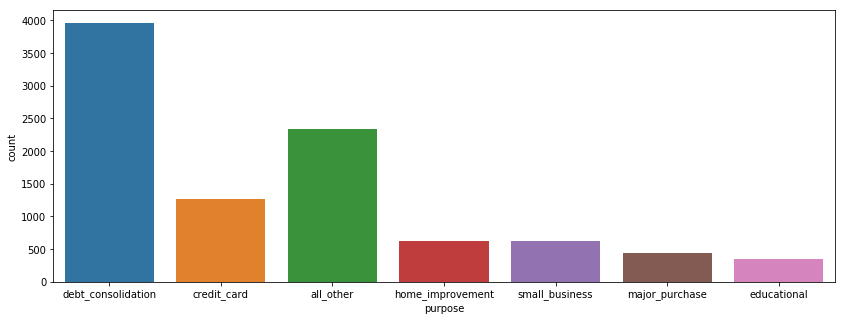

In [12]:
plt.figure(figsize=(14,5))
sns.countplot(loan['purpose'])

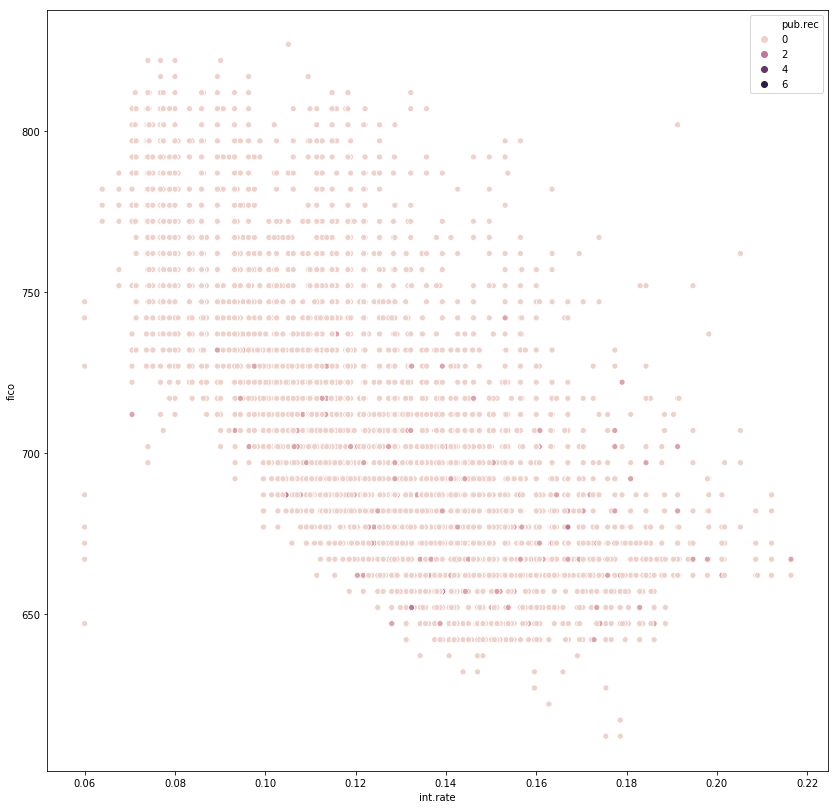

In [24]:
plt.figure(figsize=(14,14))
sns.scatterplot( loan['int.rate'],loan['fico'], hue = loan['pub.rec'])

In [34]:
x = loan.iloc[:,0:13].values
pd.DataFrame(x).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1,debt_consolidation,0.1189,829.1,11.3504,19.48,737,5639.96,28854,52.1,0,0,0
1,1,credit_card,0.1071,228.22,11.0821,14.29,707,2760,33623,76.7,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.3735,11.63,682,4710,3511,25.6,1,0,0
3,1,debt_consolidation,0.1008,162.34,11.3504,8.1,712,2699.96,33667,73.2,1,0,0
4,1,credit_card,0.1426,102.92,11.2997,14.97,667,4066,4740,39.5,0,1,0


In [31]:
y = loan.iloc[:,13].values
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [39]:
labex = LabelEncoder()

In [40]:
x[:,1] = labex.fit_transform(x[:,1])
x

array([[1, 2, 0.1189, ..., 0, 0, 0],
       [1, 1, 0.1071, ..., 0, 0, 0],
       [1, 2, 0.1357, ..., 1, 0, 0],
       ...,
       [0, 2, 0.1071, ..., 8, 0, 0],
       [0, 4, 0.16, ..., 5, 0, 0],
       [0, 2, 0.1392, ..., 6, 0, 0]], dtype=object)

In [41]:
onehotx = OneHotEncoder(categorical_features=[1])

In [43]:
x = onehotx.fit_transform(x).toarray()

C:\Users\Manoj\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Manoj\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [44]:
pd.DataFrame(x).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.1189,829.10,11.350407,19.48,737.0,5639.958333,28854.0,52.1,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.1071,228.22,11.082143,14.29,707.0,2760.000000,33623.0,76.7,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.1357,366.86,10.373491,11.63,682.0,4710.000000,3511.0,25.6,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.1008,162.34,11.350407,8.10,712.0,2699.958333,33667.0,73.2,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.1426,102.92,11.299732,14.97,667.0,4066.000000,4740.0,39.5,0.0,1.0,0.0


In [55]:
pd.DataFrame(x[:,(9)]).head()

,0
0,829.10
1,228.22
2,366.86
3,162.34
4,102.92


In [57]:
x1 = np.delete(x, 1)
x1

array([0., 1., 0., ..., 6., 0., 0.])

In [60]:
pd.DataFrame(x).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.1189,829.10,11.350407,19.48,737.0,5639.958333,28854.0,52.1,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.1071,228.22,11.082143,14.29,707.0,2760.000000,33623.0,76.7,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.1357,366.86,10.373491,11.63,682.0,4710.000000,3511.0,25.6,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.1008,162.34,11.350407,8.10,712.0,2699.958333,33667.0,73.2,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.1426,102.92,11.299732,14.97,667.0,4066.000000,4740.0,39.5,0.0,1.0,0.0


In [83]:
x[:2]

array([[0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        1.18900000e-01, 8.29100000e+02, 1.13504065e+01, 1.94800000e+01,
        7.37000000e+02, 5.63995833e+03, 2.88540000e+04, 5.21000000e+01,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        1.07100000e-01, 2.28220000e+02, 1.10821426e+01, 1.42900000e+01,
        7.07000000e+02, 2.76000000e+03, 3.36230000e+04, 7.67000000e+01,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [87]:
x1 = x[0:,[0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]]

In [88]:
x_train, x_test, y_train, y_test = train_test_split(x1,y, test_size = 0.2, random_state = 111)

In [89]:
from sklearn.linear_model import LogisticRegression

In [90]:
logi = LogisticRegression()

In [92]:
logi.fit(x_train,y_train)

C:\Users\Manoj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [93]:
y_pred = logi.predict(x_test)

In [94]:
from sklearn.metrics import confusion_matrix

In [95]:
confusion_matrix(y_test, y_pred)

array([[1620,   15],
       [ 280,    1]], dtype=int64)

In [96]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [97]:
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

In [98]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [99]:
y_pred_dt = dt.predict(x_test)
confusion_matrix(y_test, y_pred_dt)

array([[1346,  289],
       [ 209,   72]], dtype=int64)

In [100]:
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
confusion_matrix(y_test,y_pred_rf)

C:\Users\Manoj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([[1596,   39],
       [ 271,   10]], dtype=int64)